In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('notebooks_final/08-Linear-Regression-Models/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


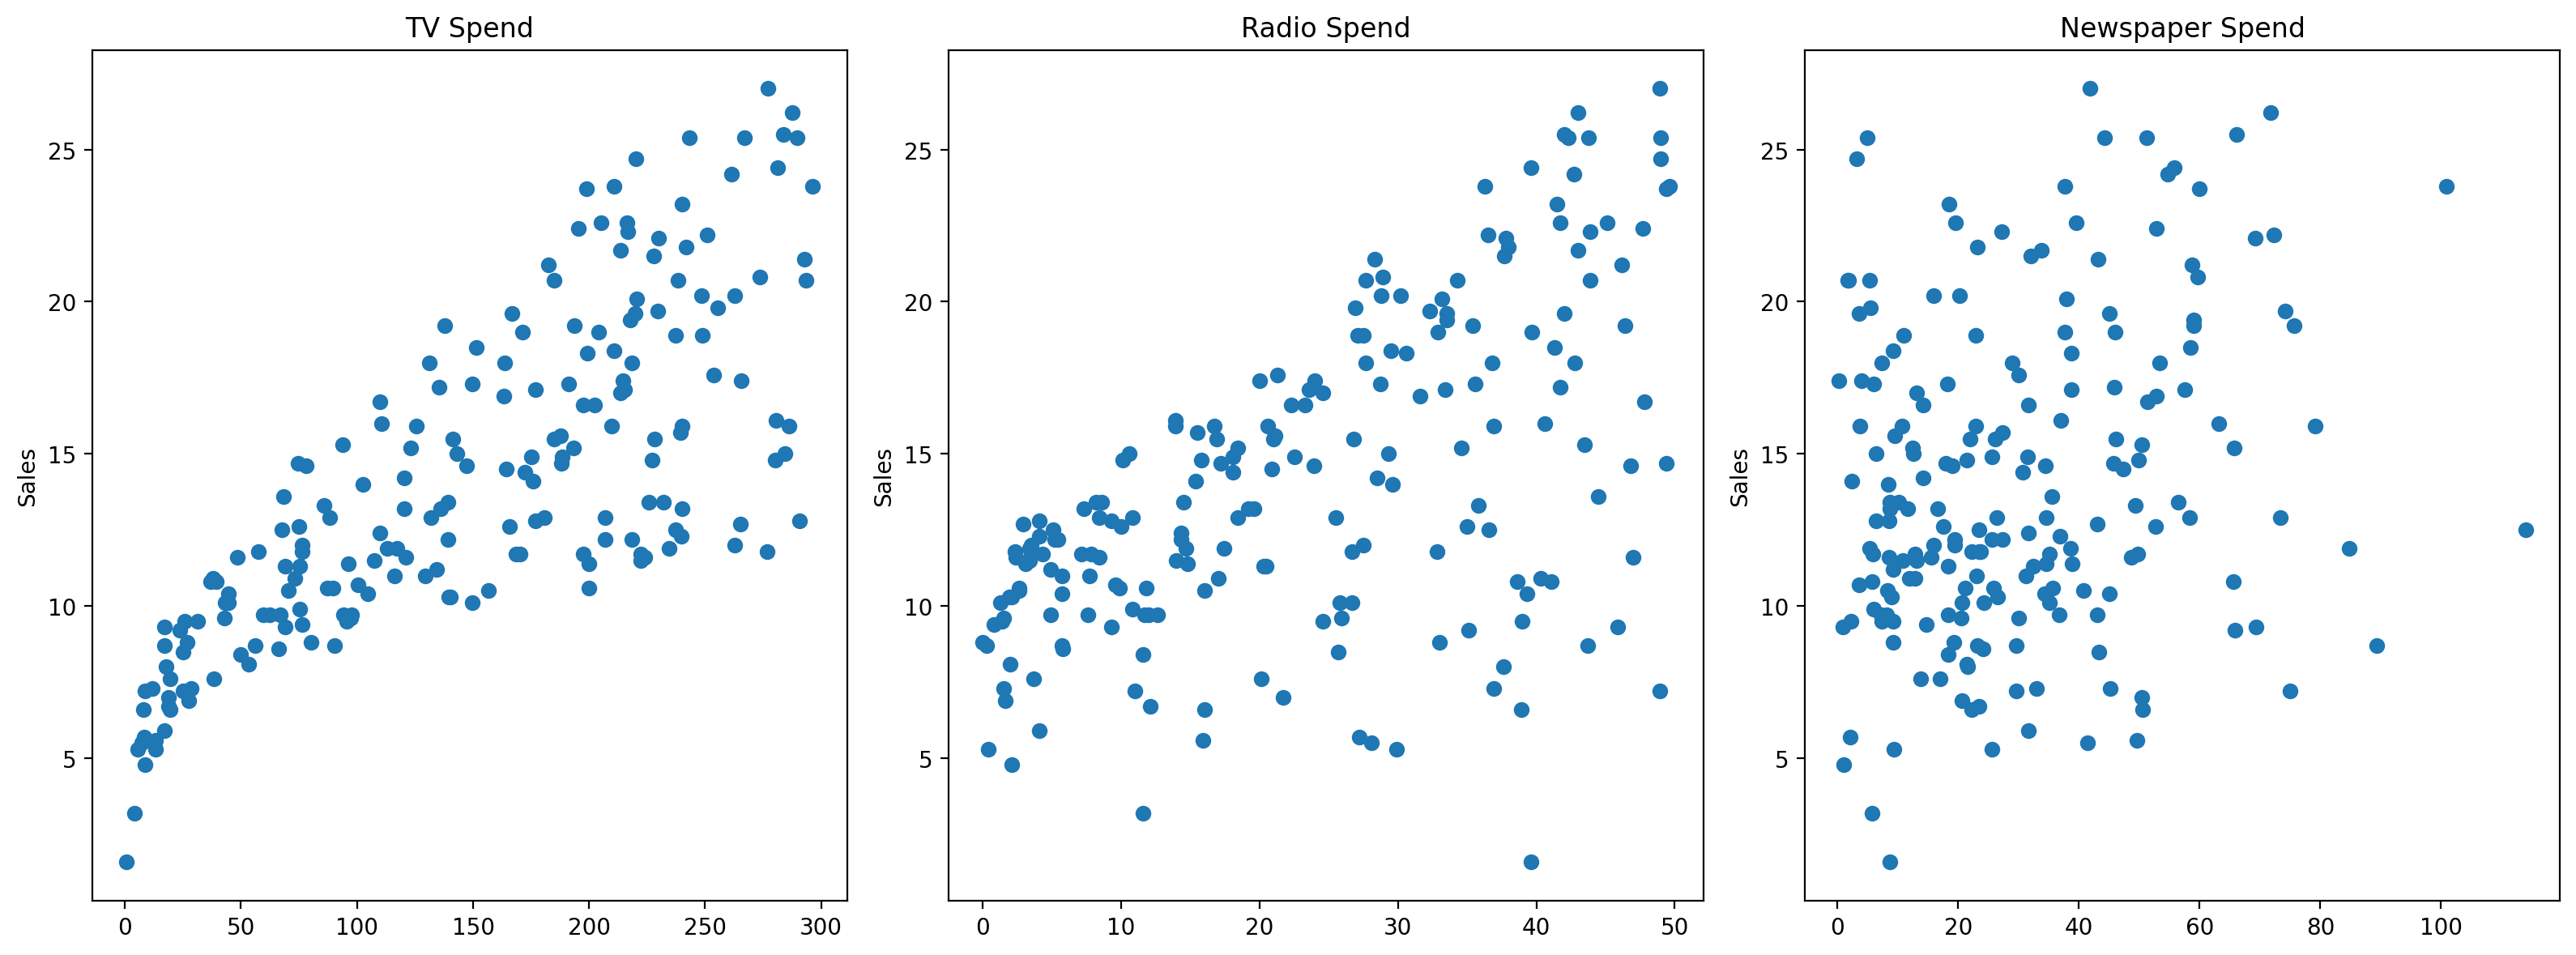

In [45]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6), dpi=200)

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [46]:
#sns.pairplot(df);

In [47]:
X = df.drop('sales',axis=1)
y = df['sales']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
from sklearn.linear_model import LinearRegression
# help(LinearRegression)
model = LinearRegression()
model.fit(X_train,y_train) # fit the model;

LinearRegression()

## Mean Absolute Error
* This is the mean of the absolute value of errors;
* Easy to understand.

## Mean Squared Error
* Larger errors are "punished" more than MAE, making MSE more popular.
* Different unit than y;
* It reports units of y squared.

## Root Mean Square Error
* This is the square root of the mean of the squared errors;
* Most popular (has same unit as y).

In [50]:
df.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [51]:
test_predictions = model.predict(X_test) # predict on the test set

In [52]:
df['sales'].mean()

14.0225

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, test_predictions) # MAE

1.2137457736144808

In [54]:
mean_squared_error(y_test, test_predictions) # MSE

2.2987166978863782

In [55]:
np.sqrt(mean_squared_error(y_test, test_predictions)) # RMSE

1.516151937599388

## Residual Plot

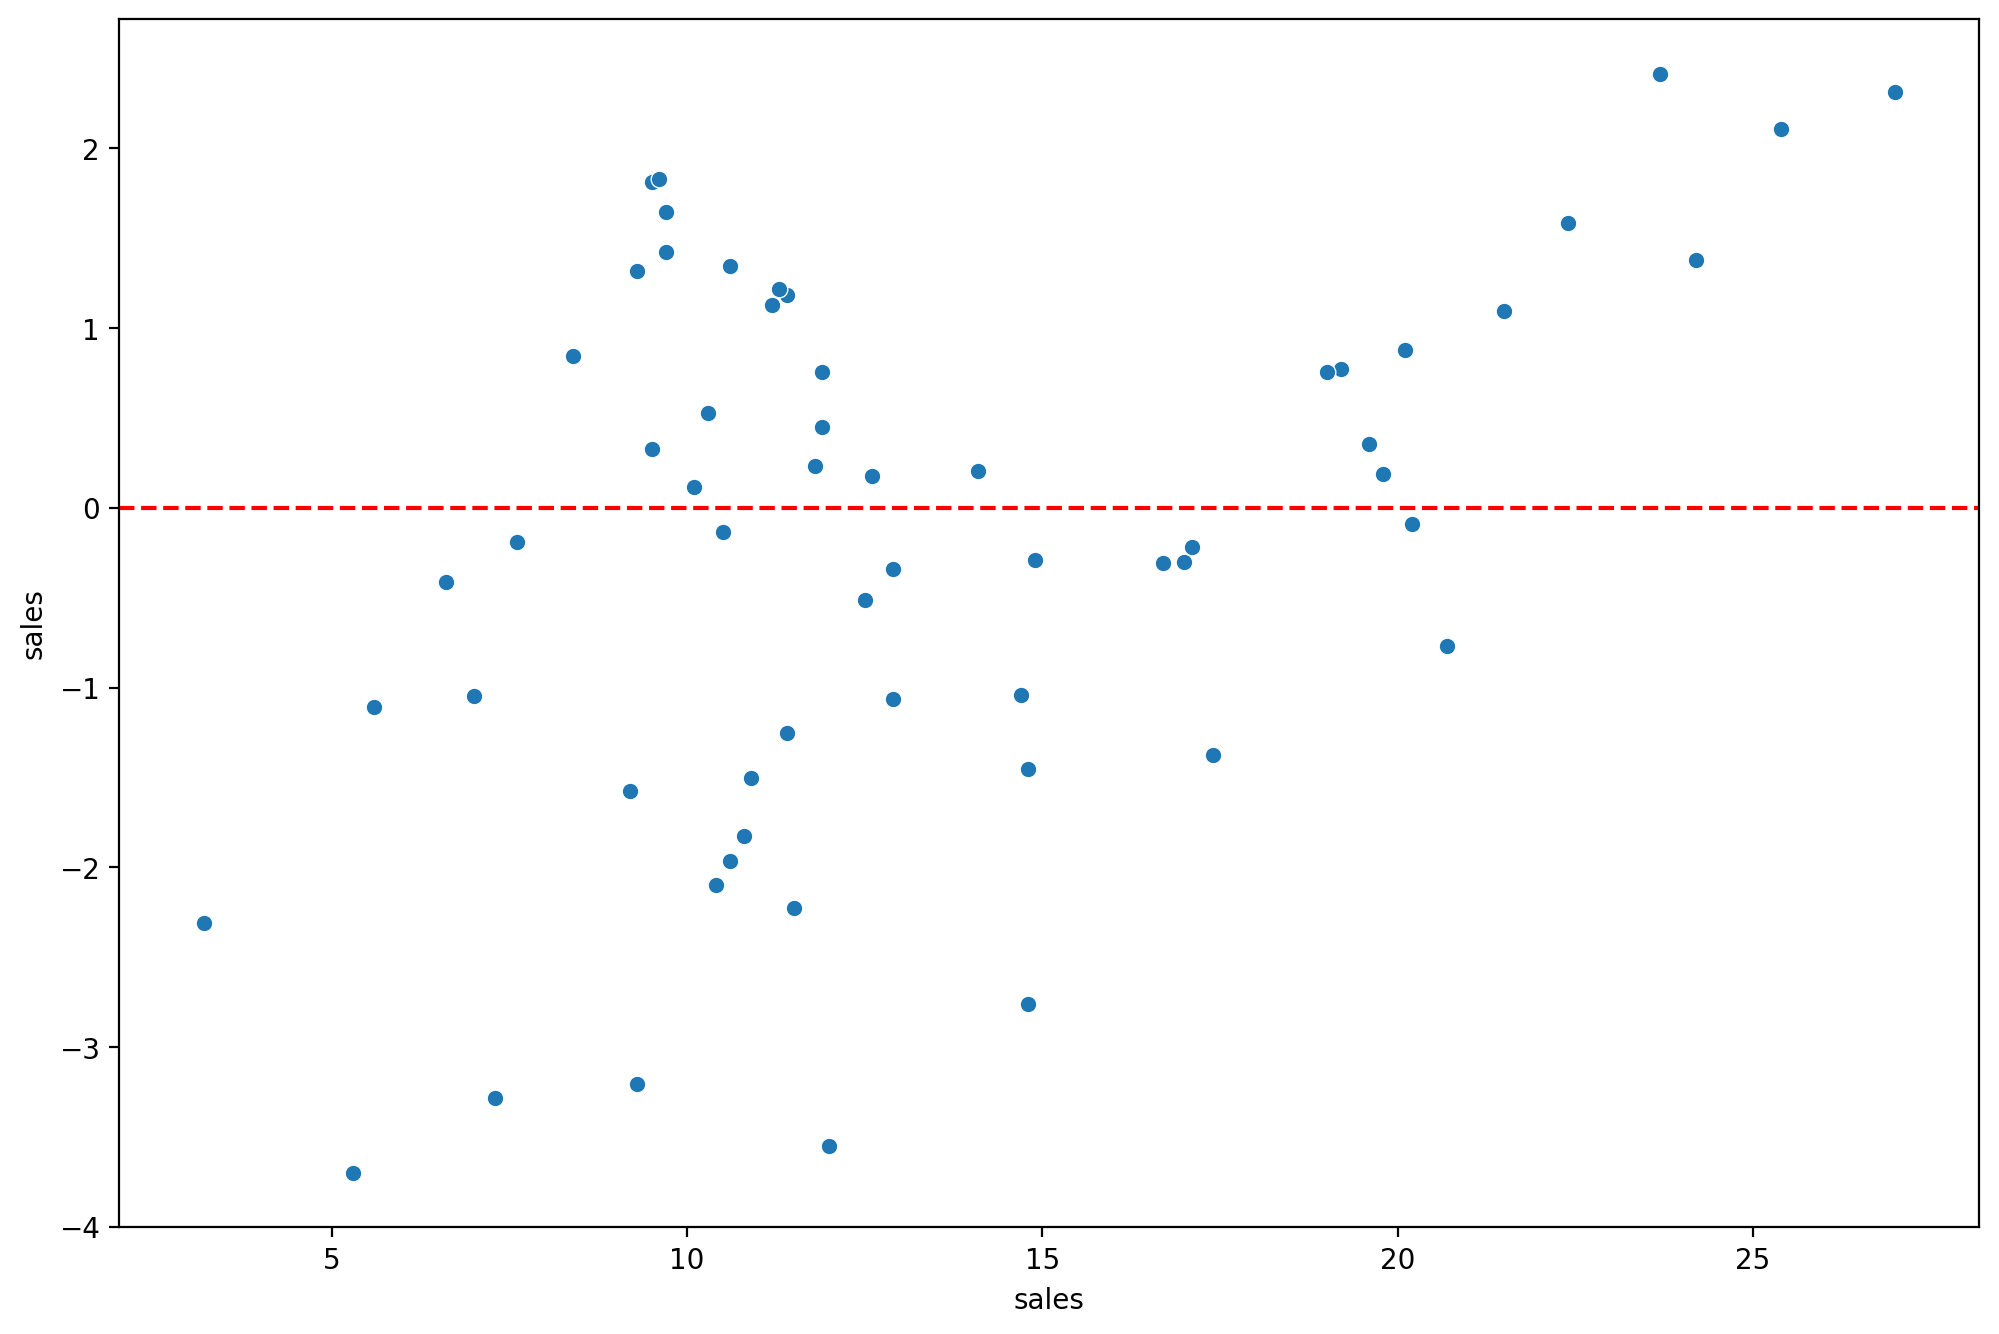

In [71]:
test_residuals = y_test - test_predictions
fig = plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y=0,color='red', linestyle='--');

<Figure size 2400x1600 with 0 Axes>

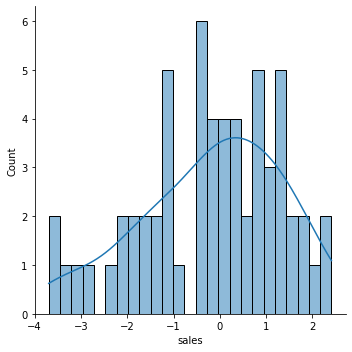

In [77]:
fig = plt.figure(figsize=(12,8), dpi=200)
sns.displot(test_residuals, bins=25, kde=True);

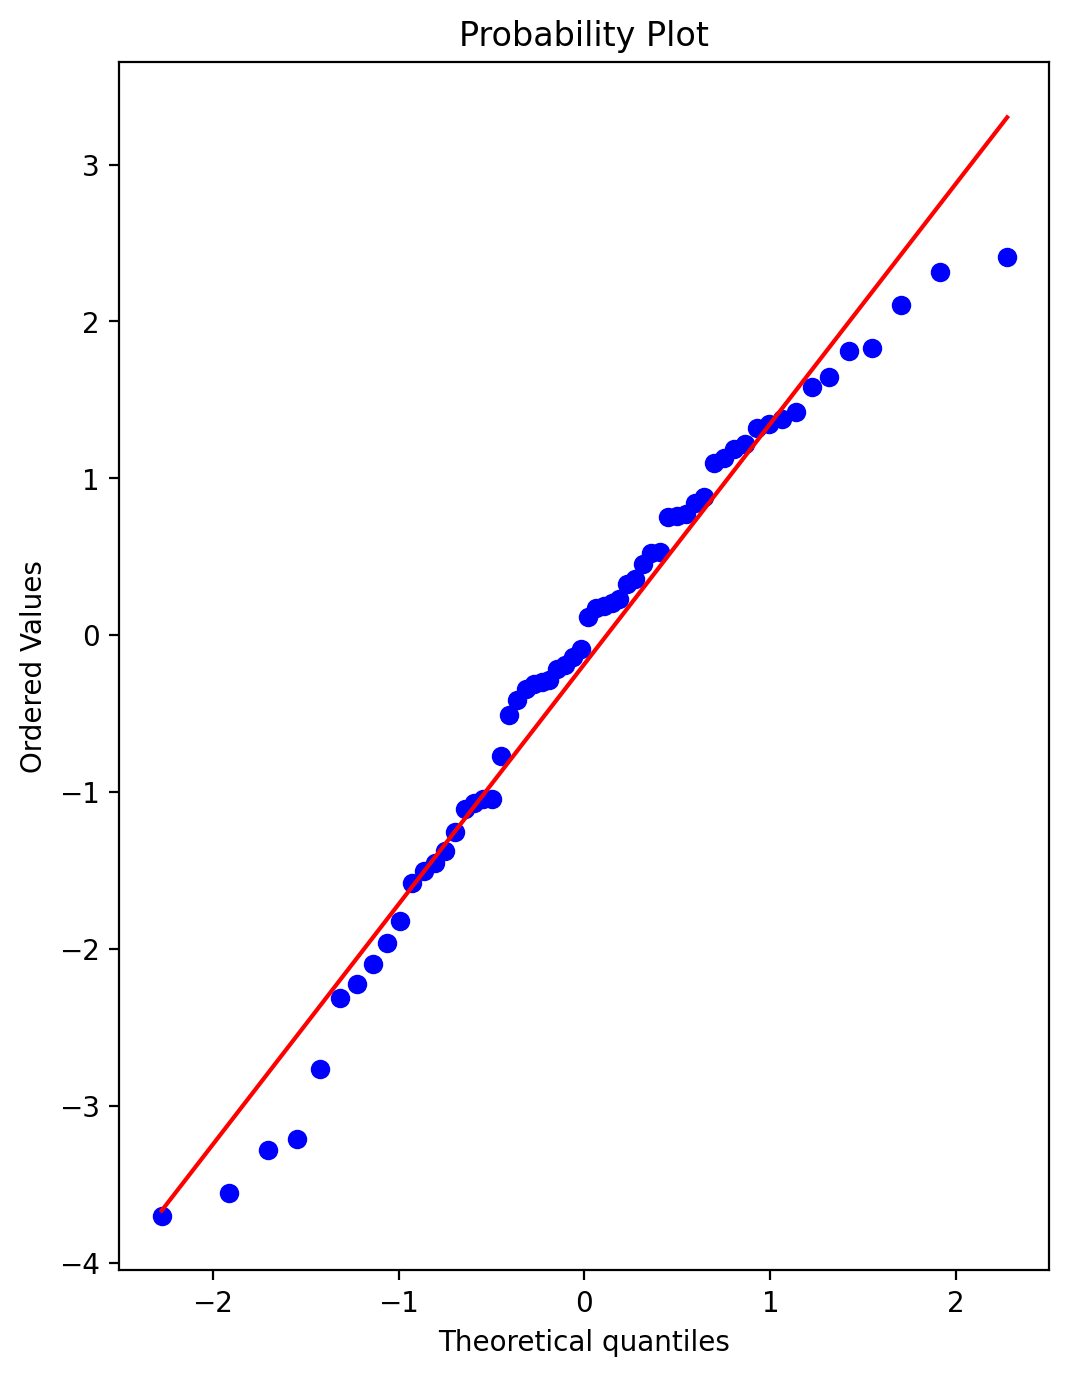

In [82]:
import scipy as sp
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=200)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)

In [90]:
final_model = LinearRegression()
final_model.fit(X,y)
# Coefficients of the model: TV, Radio, Newspaper 
# like delta in finance (holding the rest constant, rate of change of the sales unit)

final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [91]:
y_hat = final_model.predict(X) 

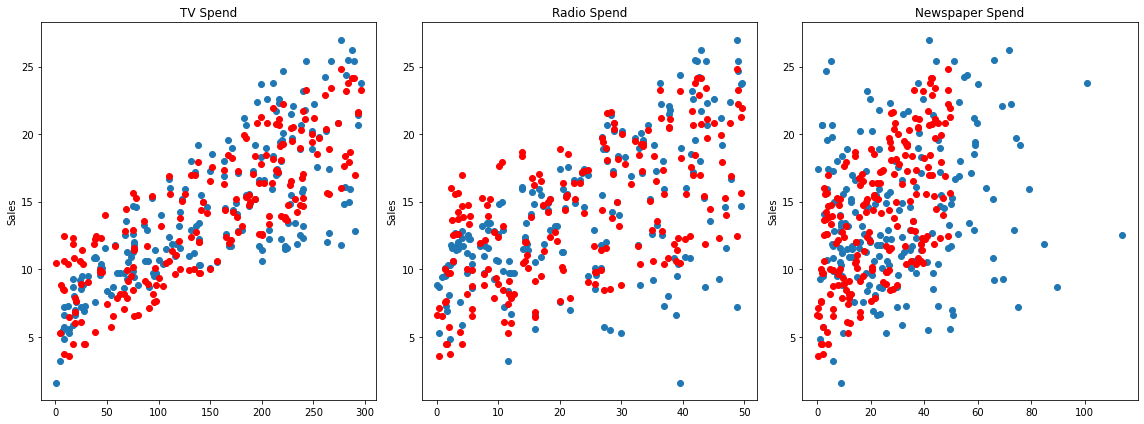

In [92]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [98]:
from joblib import dump, load
dump(final_model, 'final_sales.joblib')
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [100]:
# 149 TV, 22 Radio, and 12 Newspaper
campaign = [[149, 22, 12]]

In [101]:
loaded_model.predict(campaign)

array([13.893032])